In [1]:
import pandas as pd
import numpy as np
import gensim as gs

In [2]:
dcal = pd.read_csv("cleansed_dcal_data.csv")
dcal.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi. Most disorganized...,Solo Leisure,Economy Class,May 2018,no
1,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,Doha to Kochi. The check in staff were unprof...,Solo Leisure,Economy Class,May 2018,no
2,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"Bhubaneshwar to Mumbai. IndiGo, being a low-c...",Solo Leisure,Economy Class,January 2018,yes
3,3,http://www.airlinequality.com/airline-reviews/...,10,"""happy with this sweet gestue""",NaN,Kiranraj Nayak,India,14th May 2018,Trip Verified,indigo-airlines,Me and my wife were travelling to Bangalore f...,Family Leisure,Economy Class,March 2018,yes
4,4,http://www.airlinequality.com/airline-reviews/...,10,"""such caring staff""",NaN,Dr Bhawna Johri,India,12th May 2018,Trip Verified,indigo-airlines,Flew Coimbatore to Delhi. First of all thank ...,Family Leisure,Economy Class,April 2018,no


In [3]:
indigo_neg = dcal[(dcal["Airline_Name"] == "indigo-airlines") & (dcal["Recommended"] == "no")]
indigo_pos = dcal[(dcal["Airline_Name"] == "indigo-airlines") & (dcal["Recommended"] == "yes")]

spicejet_neg = dcal[(dcal["Airline_Name"] == "spicejet") & (dcal["Recommended"] == "no")]
spicejet_pos = dcal[(dcal["Airline_Name"] == "spicejet") & (dcal["Recommended"] == "yes")]

airasia_neg = dcal[(dcal["Airline_Name"] == "airasia") & (dcal["Recommended"] == "no")]
airasia_pos = dcal[(dcal["Airline_Name"] == "airasia") & (dcal["Recommended"] == "yes")]

easyjet_neg = dcal[(dcal["Airline_Name"] == "easyjet") & (dcal["Recommended"] == "no")]
easyjet_pos = dcal[(dcal["Airline_Name"] == "easyjet") & (dcal["Recommended"] == "yes")]

ryanair_neg = dcal[(dcal["Airline_Name"] == "ryanair") & (dcal["Recommended"] == "no")]
ryanair_pos = dcal[(dcal["Airline_Name"] == "ryanair") & (dcal["Recommended"] == "yes")]

southwest_neg = dcal[(dcal["Airline_Name"] == "southwest-airlines") & (dcal["Recommended"] == "no")]
southwest_pos = dcal[(dcal["Airline_Name"] == "southwest-airlines") & (dcal["Recommended"] == "yes")]


In [4]:
import spacy

In [5]:
indigo_neg.index

Int64Index([  0,   1,   4,   5,   7,   8,   9,  10,  11,  12,  20,  23,  24,
             25,  27,  29,  31,  32,  35,  36,  38,  40,  42,  45,  46,  47,
             50,  51,  53,  55,  60,  71,  72,  78,  81,  84,  95, 103, 104,
            105, 110, 120, 122, 133, 134, 137, 140, 175, 177, 179, 183],
           dtype='int64')

In [6]:
df = indigo_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
indigo_neg_sen = df
indigo_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi,Solo Leisure,Economy Class,May 2018,no
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Most disorganized and inefficient airline I h...,Solo Leisure,Economy Class,May 2018,no
2,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,"Multiple delays, standing in line for over 8+...",Solo Leisure,Economy Class,May 2018,no
3,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Do not fly with this airline,Solo Leisure,Economy Class,May 2018,no
4,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,,Solo Leisure,Economy Class,May 2018,no


In [7]:
df = indigo_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
indigo_pos_sen = df
indigo_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Bhubaneshwar to Mumbai,Solo Leisure,Economy Class,January 2018,yes
1,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"IndiGo, being a low-cost no-frills airline is...",Solo Leisure,Economy Class,January 2018,yes
2,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Although their in-flight menu is bit expensiv...,Solo Leisure,Economy Class,January 2018,yes
3,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"From ground handling to the crews' services, ...",Solo Leisure,Economy Class,January 2018,yes
4,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,The students fare scheme is a boon indeed,Solo Leisure,Economy Class,January 2018,yes


In [8]:
df = spicejet_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
spicejet_neg_sen = df
spicejet_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,Jaipur to Hyderabad,Couple Leisure,Economy Class,June 2018,no
1,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,"Too bad experience, as my schedule is ruined",Couple Leisure,Economy Class,June 2018,no
2,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,My flight was on 9,Couple Leisure,Economy Class,June 2018,no
3,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,"15 pm on 8th june, but in evening 4pm I receiv...",Couple Leisure,Economy Class,June 2018,no
4,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,Then about 5pm I received another notificatio...,Couple Leisure,Economy Class,June 2018,no


In [9]:
df = spicejet_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
spicejet_pos_sen = df
spicejet_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,Pune to Dubai,Couple Leisure,Economy Class,April 2018,yes
1,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,Departure and arrival on time,Couple Leisure,Economy Class,April 2018,yes
2,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,Checkin at Pune airport was quick,Couple Leisure,Economy Class,April 2018,yes
3,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,New aircraft and clean interior and toilets,Couple Leisure,Economy Class,April 2018,yes
4,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,I paid Rs 300 for chicken meal and was good,Couple Leisure,Economy Class,April 2018,yes


In [10]:
df = airasia_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
airasia_neg_sen = df
airasia_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,Hong Kong to Phuket,Family Leisure,Economy Class,February 2018,no
1,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I booked the premium flex ticket to get good ...,Family Leisure,Economy Class,February 2018,no
2,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I was advised that this type of ticket allowe...,Family Leisure,Economy Class,February 2018,no
3,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I needed to change my flight date more than a...,Family Leisure,Economy Class,February 2018,no
4,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I tried for days to access my booking on Aira...,Family Leisure,Economy Class,February 2018,no


In [11]:
df = airasia_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
airasia_pos_sen = df
airasia_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,My flight with AirAsia was from Singapore to ...,Family Leisure,Economy Class,May 2018,yes
1,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,Boarding was slow but we reached Penang befor...,Family Leisure,Economy Class,May 2018,yes
2,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,Cabin crew were friendly and were eager in he...,Family Leisure,Economy Class,May 2018,yes
3,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,Seat was okay,Family Leisure,Economy Class,May 2018,yes
4,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,"Overall, the flight with AirAsia was a good one",Family Leisure,Economy Class,May 2018,yes


In [12]:
df = easyjet_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
easyjet_neg_sen = df
easyjet_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,Gibraltar to Manchester flight cancelled on 2...,Family Leisure,Economy Class,April 2018,no
1,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,"We were a party of 9 (myself, my partner, 3 s...",Family Leisure,Economy Class,April 2018,no
2,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,No assistance from easyJet ground crew in fin...,Family Leisure,Economy Class,April 2018,no
3,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,Managed to get a flight from Malaga to Doncas...,Family Leisure,Economy Class,April 2018,no
4,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,This really was the very best we could get,Family Leisure,Economy Class,April 2018,no


In [13]:
df = easyjet_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
easyjet_pos_sen = df
easyjet_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,21,Couple Leisure,Economy Class,June 2018,yes
1,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,55 flight from Paris to Luton,Couple Leisure,Economy Class,June 2018,yes
2,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,Flight delayed as staff unable to disembark t...,Couple Leisure,Economy Class,June 2018,yes
3,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,After 45 minutes one wheelchair was located a...,Couple Leisure,Economy Class,June 2018,yes
4,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,My flight left one hour later than scheduled ...,Couple Leisure,Economy Class,June 2018,yes


In [14]:
df = ryanair_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
ryanair_neg_sen = df
ryanair_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,Madrid to Sofia,Couple Leisure,Economy Class,June 2018,no
1,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,The most unhelpful customer service ever! Wha...,Couple Leisure,Economy Class,June 2018,no
2,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,"If you can, save yourself the headache and ch...",Couple Leisure,Economy Class,June 2018,no
3,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,Talking to Ryanair's support staff was like t...,Couple Leisure,Economy Class,June 2018,no
4,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,They are trained to copy and paste generic re...,Couple Leisure,Economy Class,June 2018,no


In [15]:
df = ryanair_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
ryanair_pos_sen = df
ryanair_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,Alicante to East Midlands,Couple Leisure,Economy Class,June 2018,yes
1,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,Ryanair is a budget airline that i use on a r...,Couple Leisure,Economy Class,June 2018,yes
2,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,I choose them because of price only and if yo...,Couple Leisure,Economy Class,June 2018,yes
3,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,,Couple Leisure,Economy Class,June 2018,yes
4,366,http://www.airlinequality.com/airline-reviews/...,8,"""amazing service""",NaN,Paul Dorrington,United Kingdom,15th May 2018,Trip Verified,ryanair,Krakow to Stansted,Family Leisure,Economy Class,May 2018,yes


In [16]:
df = southwest_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
southwest_neg_sen = df
southwest_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,Portland to Nashville via Baltimore,Solo Leisure,Economy Class,June 2018,no
1,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,I am disappointed in this airline and never g...,Solo Leisure,Economy Class,June 2018,no
2,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,In the past few years that I’ve flown with So...,Solo Leisure,Economy Class,June 2018,no
3,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,"Today, they delayed my flight so much that I ...",Solo Leisure,Economy Class,June 2018,no
4,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,The placed me on one of the latest flights to...,Solo Leisure,Economy Class,June 2018,no


In [17]:
df = southwest_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
southwest_pos_sen = df
southwest_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,Oakland to Orange County,Solo Leisure,Economy Class,June 2018,yes
1,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,10 out of the 12 flights I had with Southwest...,Solo Leisure,Economy Class,June 2018,yes
2,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,I’m very disappointed since a chunk of my tim...,Solo Leisure,Economy Class,June 2018,yes
3,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,"I always fly out from Oakland to either SNA, ...",Solo Leisure,Economy Class,June 2018,yes
4,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,I’ve been a loyal customer for 4,Solo Leisure,Economy Class,June 2018,yes


In [18]:
#nlp = spacy.load('en_core_web_lg')

In [19]:
#doc1 = nlp(indigo_neg_sen["Review_Text_Clean"][1])

In [20]:
# for token in doc1:
#     print(token.text, token.has_vector, len(token.vector))

In [21]:
from gensim.parsing.preprocessing import remove_stopwords

In [22]:
indigo_neg_sen["tokennized_review_sen"] = indigo_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_indigo_neg = gs.models.Word2Vec(indigo_neg_sen["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)
indigo_pos_sen["tokennized_review_sen"] = indigo_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_indigo_pos = gs.models.Word2Vec(indigo_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [23]:
spicejet_neg_sen["tokennized_review_sen"] = spicejet_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_spicejet_neg = gs.models.Word2Vec(spicejet_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
spicejet_pos_sen["tokennized_review_sen"] = spicejet_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_spicejet_pos = gs.models.Word2Vec(spicejet_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [24]:
easyjet_neg_sen["tokennized_review_sen"] = easyjet_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_easyjet_neg = gs.models.Word2Vec(easyjet_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
easyjet_pos_sen["tokennized_review_sen"] = easyjet_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_easyjet_pos = gs.models.Word2Vec(easyjet_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [25]:
ryanair_neg_sen["tokennized_review_sen"] = ryanair_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_ryanair_neg = gs.models.Word2Vec(ryanair_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
ryanair_pos_sen["tokennized_review_sen"] = ryanair_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_ryanair_pos = gs.models.Word2Vec(ryanair_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [26]:
airasia_neg_sen["tokennized_review_sen"] = airasia_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_airasia_neg = gs.models.Word2Vec(airasia_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
airasia_pos_sen["tokennized_review_sen"] = airasia_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_airasia_pos = gs.models.Word2Vec(airasia_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [27]:
southwest_neg_sen["tokennized_review_sen"] = southwest_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_southwest_neg = gs.models.Word2Vec(southwest_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
southwest_pos_sen["tokennized_review_sen"] = southwest_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_southwest_pos = gs.models.Word2Vec(southwest_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [28]:
print(model_ryanair_neg["cabin"])

[-0.32224298 -0.19339277 -0.02121579 -0.1974175   0.16401419 -0.18697697
 -0.11958636 -0.17215209 -0.38393015  0.10296127 -0.34051153  0.11825714
 -0.47981274  0.2617286   0.21151972  0.23861378 -0.27089238  0.47976786
  0.02871626  0.2918759   0.3941542   0.17861043  0.45153856  0.63492024
 -0.25486624  0.0498285  -0.5174473   0.49672285  0.21976247 -0.18148015
 -0.13944443  0.15848841 -0.14426775  0.2846765   0.05947635  0.53988284
  0.11461478  0.00439775 -0.25551185  0.0092244  -0.14792788 -0.44526833
  0.03773515  0.20409957 -0.18453625  0.01049626  0.15439849 -0.19405966
 -0.13441625  0.07603892  0.17541474 -0.28454983 -0.13361235 -0.0487698
 -0.40935966 -0.22457564  0.00830015  0.00247956 -0.30056033  0.38770244
 -0.06984339  0.3826837  -0.09674957  0.21643366  0.06895263 -0.3361954
 -0.05629384 -0.02261911  0.13575782 -0.39649066  0.05361205  0.00181918
 -0.02160349  0.3660814   0.24040991  0.09608731 -0.11590138 -0.05614171
 -0.29009938  0.19333112  0.09253459 -0.43773073  0.3

/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [29]:
model_indigo_neg.wv.most_similar(positive="seat")

[('unexpected', 0.20122358202934265),
 ('budget', 0.19820772111415863),
 ('while', 0.1888403296470642),
 ('poor', 0.18141870200634003),
 ('jaipur', 0.17840778827667236),
 ('charger', 0.17822876572608948),
 ('systems', 0.17766520380973816),
 ('hours', 0.17474758625030518),
 ('pathetic', 0.17366304993629456),
 ('struggle', 0.17353929579257965)]

## Custom sentence -> Vector Representation function

In [30]:
def sen2vec(sentence, model) :
    sentence_vec = np.array(np.repeat(0.0, 200))
    for word in sentence:
        try:
            word_vec = np.array(model[word])
            sentence_vec += word_vec
        except KeyError:
            continue
    return sentence_vec / len(sentence)

In [31]:
indigo_neg_sen["avg_sen_vec"] = indigo_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_indigo_neg))
indigo_pos_sen["avg_sen_vec"] = indigo_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_indigo_pos))

spicejet_neg_sen["avg_sen_vec"] = spicejet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_spicejet_neg))
spicejet_pos_sen["avg_sen_vec"] = spicejet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_spicejet_pos))

easyjet_neg_sen["avg_sen_vec"] = easyjet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_easyjet_neg))
easyjet_pos_sen["avg_sen_vec"] = easyjet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_easyjet_pos))

airasia_neg_sen["avg_sen_vec"] = airasia_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_airasia_neg))
airasia_pos_sen["avg_sen_vec"] = airasia_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_airasia_pos))

ryanair_neg_sen["avg_sen_vec"] = ryanair_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_ryanair_neg))
ryanair_pos_sen["avg_sen_vec"] = ryanair_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_ryanair_pos))

southwest_neg_sen["avg_sen_vec"] = southwest_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_southwest_neg))
southwest_pos_sen["avg_sen_vec"] = southwest_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_southwest_pos))


/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [32]:
# model_indigo_pos.wv.most_similar(positive="expensive")
model_ryanair_neg.wv.most_similar(positive="staff")

[('flight', 0.9999747276306152),
 ('passengers', 0.9999727606773376),
 ('seats', 0.9999717473983765),
 ('ryanair', 0.9999688863754272),
 ('people', 0.9999681711196899),
 ('it', 0.999967634677887),
 ('plane', 0.9999663233757019),
 ('like', 0.9999659061431885),
 ('the', 0.9999653100967407),
 ('airport', 0.9999648332595825)]

## Segregating positive and negative reviews, cleaning and spliting (sentence-wise) the Review Text
## and generating new rows for each sentence of all the reviews

In [33]:
# dcal["Review_Title"] = dcal["Review_Title"].str.slice(1,-1)
# dcal["Review_Text_Clean"] = dcal["Review_Title"].astype(str) + "." + dcal["Review_Text_Clean"].astype(str)
df_neg = dcal[dcal["Rating"]<5 ]
df_pos = dcal[dcal["Rating"]>5]
df_pos = (df_pos.set_index(df_pos.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df_pos.columns])
df_pos = df_pos[(df_pos["Review_Text_Clean"] != "") & (df_pos["Review_Text_Clean"] != " ") & (df_pos["Review_Text_Clean"] != None)]

df_neg = (df_neg.set_index(df_neg.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df_neg.columns])
df_neg = df_neg[(df_neg["Review_Text_Clean"] != "") & (df_neg["Review_Text_Clean"] != " ") & (df_neg["Review_Text_Clean"] != None)]
df_neg.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi,Solo Leisure,Economy Class,May 2018,no
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Most disorganized and inefficient airline I h...,Solo Leisure,Economy Class,May 2018,no
2,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,"Multiple delays, standing in line for over 8+...",Solo Leisure,Economy Class,May 2018,no
3,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Do not fly with this airline,Solo Leisure,Economy Class,May 2018,no
5,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,Doha to Kochi,Solo Leisure,Economy Class,May 2018,no


## Function to remove custom stopwords

In [34]:
def remove_custom_stopwords(df_row):
    stopwords = ["this", "fly", "flying", "flew", "then", "that", "how", "said", "airport", "plane", "flight", "flights", "airline", "airlines", "we", "the", "they", "it", "ryanair", "easyjet", "southwest", "indigo", "spicejet", "airasia"]
    cleansed_sentence = []
    for word in df_row:
        if word not in stopwords:
            cleansed_sentence.append(word)
    return cleansed_sentence

In [35]:
df_neg["tokennized_review_sen"] = df_neg["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
df_neg["tokennized_review_sen"] = df_neg["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
model_df_neg = gs.models.Word2Vec(df_neg["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)

df_pos["tokennized_review_sen"] = df_pos["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
df_pos["tokennized_review_sen"] = df_pos["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
model_df_pos = gs.models.Word2Vec(df_pos["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)



In [36]:
model_df_neg.wv.most_similar(positive="trip")

[('going', 0.9999736547470093),
 ('day', 0.9999732971191406),
 ('days', 0.9999725818634033),
 ('passenger', 0.9999719858169556),
 ('booked', 0.9999716281890869),
 ('home', 0.9999716281890869),
 ('able', 0.9999711513519287),
 ('problem', 0.9999697804450989),
 ('holiday', 0.9999697208404541),
 ('there', 0.999969482421875)]

In [37]:
model_df_pos.wv.most_similar(positive="delay")

[('took', 0.999943733215332),
 ('leaving', 0.9999223947525024),
 ('slightly', 0.9999150037765503),
 ('morning', 0.999909520149231),
 ('departing', 0.999908447265625),
 ('arriving', 0.9999066591262817),
 ('return', 0.9999043941497803),
 ('earlier', 0.9998946785926819),
 ('min', 0.9998927712440491),
 ('outbound', 0.9998694658279419)]

In [38]:
# indigo_neg_sen["avg_sen_vec"] = indigo_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# indigo_pos_sen["avg_sen_vec"] = indigo_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# spicejet_neg_sen["avg_sen_vec"] = spicejet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# spicejet_pos_sen["avg_sen_vec"] = spicejet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# easyjet_neg_sen["avg_sen_vec"] = easyjet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# easyjet_pos_sen["avg_sen_vec"] = easyjet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# airasia_neg_sen["avg_sen_vec"] = airasia_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# airasia_pos_sen["avg_sen_vec"] = airasia_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# ryanair_neg_sen["avg_sen_vec"] = ryanair_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# ryanair_pos_sen["avg_sen_vec"] = ryanair_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# southwest_neg_sen["avg_sen_vec"] = southwest_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# southwest_pos_sen["avg_sen_vec"] = southwest_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))



## Generating Sentence Vectors using the custom sen2vec function defined above

In [39]:
df_neg["avg_sen_vec"] = df_neg["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
df_pos["avg_sen_vec"] = df_pos["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))


/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [40]:
df_neg.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi,Solo Leisure,Economy Class,May 2018,no,"[dehradun, pune, delhi]","[-0.03764059487730265, -0.10997513541951776, -..."
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Most disorganized and inefficient airline I h...,Solo Leisure,Economy Class,May 2018,no,"[most, disorganized, inefficient, travelled]","[-0.02971241995692253, -0.08658785605803132, -..."
2,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,"Multiple delays, standing in line for over 8+...",Solo Leisure,Economy Class,May 2018,no,"[multiple, delays, standing, line, hours, talk...","[-0.13755592466755348, -0.42209977995265613, -..."
3,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Do not fly with this airline,Solo Leisure,Economy Class,May 2018,no,[do],"[-0.05256165191531181, -0.15403996407985687, -..."
5,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,Doha to Kochi,Solo Leisure,Economy Class,May 2018,no,"[doha, kochi]","[-0.010659746068995446, -0.03562281304039061, ..."


In [41]:
df_pos.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec
0,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Bhubaneshwar to Mumbai,Solo Leisure,Economy Class,January 2018,yes,"[bhubaneshwar, mumbai]","[-0.02732175274286419, -0.11484171845950186, -..."
1,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"IndiGo, being a low-cost no-frills airline is...",Solo Leisure,Economy Class,January 2018,yes,"[low, cost, no, frills, value, money]","[-0.11141003295779228, -0.48015019794305164, -..."
2,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Although their in-flight menu is bit expensiv...,Solo Leisure,Economy Class,January 2018,yes,"[although, in, menu, bit, expensive, bring, fo...","[-0.08358141864565286, -0.38867195356975903, -..."
3,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"From ground handling to the crews' services, ...",Solo Leisure,Economy Class,January 2018,yes,"[from, ground, handling, crews, services, exce...","[-0.061164027346032004, -0.38191977994782583, ..."
4,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,The students fare scheme is a boon indeed,Solo Leisure,Economy Class,January 2018,yes,"[students, fare, scheme, boon]","[-0.028231959021468356, -0.12126661697402596, ..."


## Purging rows with sentances > 11 words in order to maintain sanctity of Sentence Vectors
## Longer sentences would mean Sentence Vectors lose information by averaging all the word vector representations

In [42]:

df_neg = df_neg[df_neg["tokennized_review_sen"].apply(lambda x: len(x) > 3 and len(x) < 10)]

df_pos = df_pos[df_pos["tokennized_review_sen"].apply(lambda x: len(x) > 3 and len(x) < 10)]

X_neg = np.array(list(df_neg["avg_sen_vec"]))
X_pos = np.array(list(df_pos["avg_sen_vec"]))

X_neg


array([[-0.02971242, -0.08658786, -0.05163394, ...,  0.06762337,
         0.08135521,  0.01070837],
       [-0.11993854, -0.36052588, -0.21624152, ...,  0.28536653,
         0.33046483,  0.0431099 ],
       [-0.13124244, -0.39281853, -0.23611398, ...,  0.31282202,
         0.36478853,  0.04775756],
       ...,
       [-0.13856347, -0.41961725, -0.25205558, ...,  0.33379215,
         0.38971816,  0.04884644],
       [-0.10688569, -0.32502759, -0.19509522, ...,  0.25950264,
         0.30463751,  0.03878075],
       [-0.113591  , -0.34292857, -0.20596082, ...,  0.27115845,
         0.31765607,  0.04240224]])

## Using k-means clustering to generate clusters of sentences

In [43]:
from nltk.cluster import KMeansClusterer, cosine_distance

clusterer = KMeansClusterer(7, cosine_distance, 7)
clusters = clusterer.cluster(X_neg, True, trace=True)
df_neg["cluster"] = clusters
df_neg["cluster"].value_counts()

k-means trial 0
iteration
iteration
iteration
iteration
k-means trial 1
iteration
k-means trial 2
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
iteration
k-means trial 5
iteration
iteration
iteration
iteration
k-means trial 6
iteration
iteration
iteration
iteration


0    2049
3    1306
4     853
5     574
2     502
6     450
1     324
Name: cluster, dtype: int64

In [44]:
clusterer = KMeansClusterer(7, cosine_distance, 7)
clusters = clusterer.cluster(X_pos, True, trace=True)
df_pos["cluster"] = clusters
df_pos["cluster"].value_counts()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 1
iteration
iteration
iteration
iteration
k-means trial 2
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 5
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 6
iteration
iteration
iteration
iteration
iteration
iteration
iteratio

6    3079
4    1171
5    1118
2     782
1     595
3     414
0     291
Name: cluster, dtype: int64

In [45]:
def get_word_count(cluster_num, input_df):
    cluster_x_words = []
    cluster_x_df = input_df[input_df["cluster"]==cluster_num]
    cluster_x_df["tokennized_review_sen"].apply(lambda x: cluster_x_words.extend(x))
    cluster_x_words_df = pd.DataFrame(cluster_x_words)
    cluster_x_words_df.columns = ["words"]
    print(cluster_x_words_df["words"].value_counts())

## Neg Reviews - Cluster 0: Food, Money, Seats

In [46]:
get_word_count(0, df_neg)

seats          103
seat            92
like            76
don             72
food            69
people          66
air             64
cost            63
booked          61
experience      60
time            58
no              58
money           57
my              56
if              54
know            54
use             51
way             50
low             49
travel          49
trip            48
didn            47
cheap           47
times           46
ve              46
good            45
year            44
customers       44
think           43
asia            42
              ... 
adds             1
newer            1
turnaround       1
italian          1
eruption         1
heels            1
merger           1
replied          1
hide             1
fined            1
file             1
medicine         1
hand             1
gran             1
movies           1
immediate        1
sarcasm          1
coughed          1
steep            1
sfo              1
peace            1
unload      

## Neg Reviews - Cluster 1: Customer Service

In [47]:
get_word_count(1, df_neg)

service         245
customer        168
experience       48
worst            41
poor             28
bad              16
awful            13
staff            12
terrible         11
horrible         10
company           9
ve                9
very              8
no                8
their             8
rude              8
good              8
prices            7
years             7
help              7
hours             7
quality           7
experienced       7
existent          6
appalling         6
non               6
overall           6
onboard           6
flown             6
received          6
               ... 
refreshment       1
returns           1
professional      1
fault             1
important         1
uk                1
say               1
wrote             1
uncaring          1
manager           1
similar           1
ill               1
offered           1
west              1
heck              1
supervisors       1
although          1
utterly           1
aircraft          1


## Neg Reviews - Cluster 2: Staff, Cabin Crew, Service

In [48]:
get_word_count(2, df_neg)

staff            223
crew             101
cabin             91
rude              73
passengers        51
ground            39
told              30
friendly          26
no                22
service           21
extremely         20
didn              19
when              17
luggage           17
care              17
aircraft          17
member            16
people            16
asked             14
help              14
unhelpful         13
check             13
time              13
attendants        12
gate              11
food              10
lady              10
all               10
there             10
don               10
                ... 
course             1
luggages           1
embarrassed        1
acknowledging      1
rubbish            1
dad                1
mediocre           1
tone               1
first              1
untidy             1
total              1
hundreds           1
snacks             1
bringing           1
bacardis           1
noisy              1
positives    

## Neg Reviews - Cluster 3: Time, Cancelled Flights, Late, Delay

In [49]:
get_word_count(3, df_neg)

time             228
told              89
got               78
return            70
hours             70
passengers        58
on                56
day               51
cancelled         49
late              47
when              46
later             45
hour              42
gate              42
pm                41
board             41
asked             40
delayed           39
delay             39
home              36
finally           36
waiting           35
am                35
wait              35
after             35
left              34
lumpur            34
kuala             34
gatwick           32
took              31
                ... 
common             1
queues             1
acceptable         1
eidl               1
offers             1
fiasco             1
learnt             1
faa                1
surrendered        1
positions          1
fare               1
compensate         1
jumper             1
hopeful            1
deceitful          1
filling            1
hamburg      

## Neg Reviews - Cluster 4: Money, Pay, Extra Luggage / Bags, Payment, Charge

In [50]:
get_word_count(4, df_neg)

pay             167
check           146
luggage         122
bag             118
extra           107
seats            87
in               80
paid             75
ticket           61
online           57
baggage          54
seat             48
bags             41
checked          40
hand             36
people           35
euros            34
charge           34
money            30
don              29
charged          28
small            28
fee              27
so               26
way              25
sit              24
hold             23
booked           23
cost             22
you              22
               ... 
purses            1
stay              1
airplane          1
lingus            1
ponta             1
sporting          1
boarded           1
fooled            1
been              1
escape            1
deciving          1
incorrectly       1
abq               1
squash            1
stone             1
budapest          1
hardly            1
airtran           1
he                1


## Neg Reviews - Cluster 5: Hours, Minutes, Delayed, Late, Departure, Wait, Cancelled

In [51]:
get_word_count(5, df_neg)

hours            209
delayed          200
hour             147
minutes          103
delay            101
late              88
time              72
departure         40
pm                37
arrived           35
later             30
wait              27
left              25
cancelled         23
after             23
got               23
waiting           23
took              23
half              20
on                20
hrs               18
finally           18
told              17
boarding          16
my                16
gate              16
arrival           15
return            14
informed          13
mins              12
                ... 
several            1
spots              1
penang             1
back               1
denpasar           1
congestion         1
pushed             1
parked             1
guardia            1
granddaughter      1
determine          1
consisted          1
didn               1
worked             1
porter             1
substantial        1
receipt      

## Neg Reviews - Cluster 6: Boarding Passes, Check-in, Line, Queue, Priority Check-in

In [52]:
get_word_count(6, df_neg)

boarding      214
check         116
in             53
gate           49
time           45
pass           42
passes         36
board          33
told           33
queue          30
went           28
line           27
got            24
when           24
people         24
checked        23
minutes        23
baggage        23
print          23
passengers     23
hours          21
arrived        21
priority       19
asked          17
desk           16
online         16
early          14
waiting        14
luggage        14
group          13
             ... 
folks           1
irate           1
tsa             1
apparently      1
today           1
exiting         1
overbooked      1
matter          1
classic         1
husband         1
advised         1
take            1
chiang          1
held            1
course          1
offered         1
another         1
busy            1
volunteers      1
pushed          1
instructed      1
offloading      1
currency        1
minimal         1
extended  

In [53]:
# get_word_count(7, df_neg)

In [54]:
# get_word_count(8, df_neg)

## Pos Reviews - Cluster 0: Cabin, Crew, Friendly, Helpful, Professional, Polite, Pleasent

In [55]:
get_word_count(0, df_pos)

crew            230
cabin           188
friendly        165
staff            63
helpful          60
efficient        51
professional     51
clean            42
polite           24
aircraft         23
pleasant         19
good             15
ground           15
welcoming        13
attentive        12
courteous        12
smiling          11
time             11
cheerful          9
extremely         8
board             8
service           8
comfortable       7
excellent         7
all               6
both              5
young             5
modern            5
informative       4
passengers        4
               ... 
looked            1
energetic         1
far               1
caring            1
nevertheless      1
even              1
generous          1
passed            1
reasonably        1
airplanes         1
professonal       1
undertook         1
pune              1
nagpur            1
earlier           1
lot               1
items             1
seats             1
sell              1


## Pos Reviews - Cluster 1: Cabin, Crew, Friendly, Clean, Aircraft, Efficient, Nice

In [56]:
get_word_count(1, df_pos)

crew              294
staff             167
cabin             166
friendly          141
clean              77
helpful            68
service            67
time               61
aircraft           52
efficient          48
good               47
nice               43
ground             41
pleasant           39
professional       37
passengers         34
great              29
new                29
comfortable        29
polite             29
boarding           25
excellent          24
seats              23
attendants         18
courteous          18
check              17
board              15
food               15
way                15
onboard            15
                 ... 
mess                1
seamless            1
senior              1
lgw                 1
quarter             1
improvement         1
tiredness           1
bored               1
what                1
smoother            1
high                1
terminal            1
checkin             1
annoyed             1
emergency 

## Pos Reviews - Cluster 2: Service Staff, Aircraft, Seats, Comfortable, Clean

In [57]:
get_word_count(2, df_pos)

service         165
staff           126
aircraft         85
good             78
time             72
clean            66
nice             64
new              58
pleasant         58
excellent        57
efficient        56
crew             54
seats            45
comfortable      45
customer         44
cabin            44
check            41
ground           37
great            35
boarding         34
board            34
on               33
experience       33
attendants       31
return           25
way              22
in               20
smooth           19
all              19
passengers       19
               ... 
incredibly        1
alicante          1
swift             1
steps             1
chicago           1
patchy            1
bar               1
date              1
greet             1
impression        1
meals             1
opposed           1
hopefully         1
internal          1
expectations      1
female            1
comparable        1
develops          1
deboarding        1


## Pos Reviews - Cluster 3: Time, Minutes, Arrived Early, Late Departed, Schedule

In [58]:
get_word_count(3, df_pos)

time           230
minutes        181
arrived        177
early          142
late           117
landed          65
left            61
departed        61
schedule        53
mins            48
ahead           37
arrival         35
departure       34
return          33
delayed         33
both            22
scheduled       22
took            22
on              21
delay           19
boarding        15
hour            14
aircraft        12
outbound        12
slightly        11
earlier         10
morning         10
little          10
inbound          9
arriving         8
              ... 
waited           1
faulty           1
run              1
going            1
chat             1
frustrating      1
boyfriend        1
aceh             1
msy              1
bought           1
space            1
ri               1
meant            1
kl               1
just             1
traveled         1
trivandrum       1
lga              1
efficient        1
about            1
den              1
trip        

## Pos Reviews - Cluster 4: Good, Low Cost, Seats, Experience, Money, Value, Comfortable, Overall

In [59]:
get_word_count(4, df_pos)

good            272
seats           179
cost            140
low             136
food            126
experience      120
price           110
value           110
comfortable     101
service         100
seat            100
money            96
great            82
overall          73
legroom          69
leg              62
room             60
short            59
budget           58
better           51
recommend        36
drinks           35
carrier          34
cheap            33
excellent        32
paid             31
ok               30
new              30
all              29
best             29
               ... 
effortless        1
almost            1
changed           1
horrendous        1
easter            1
interactions      1
whom              1
ensuring          1
worn              1
lends             1
anymore           1
fixing            1
agree             1
seeing            1
pricy             1
recommand         1
suggest           1
biggest           1
domestics         1


## Pos Reviews - Cluster 5: Time, Delayed, Early, Minues, Boarding

In [60]:
get_word_count(5, df_pos)

time            379
return          179
th               90
delayed          72
departure        70
early            69
minutes          67
boarding         61
on               60
gatwick          58
london           58
gate             57
delay            55
hour             54
took             52
stansted         51
lumpur           49
kuala            49
got              47
check            45
arrived          43
kul              41
late             40
hours            34
arrival          34
mins             32
manchester       31
left             29
in               28
first            28
               ... 
positively        1
range             1
compensation      1
impressions       1
elp               1
sir               1
nuts              1
munich            1
each              1
realised          1
typically         1
suvarnbhumi       1
seriously         1
treviso           1
spoiled           1
beziers           1
tasted            1
value             1
mainline          1


## Pos Reviews - Cluster 6: Boarding, Check-in, Seats, Luggage, Free, Trip

In [61]:
get_word_count(6, df_pos)

boarding          267
check             206
seat              142
in                130
seats             121
luggage           116
free              101
trip               91
baggage            89
people             85
don                83
my                 82
like               79
bags               74
times              70
bag                70
use                69
return             67
checked            66
air                66
way                66
board              65
problem            65
booked             64
passengers         64
pay                64
didn               63
extra              61
online             59
paid               59
                 ... 
newcastle           1
bank                1
medication          1
admin               1
gadgets             1
italian             1
shuts               1
oporto              1
nation              1
suposed             1
wheels              1
domestically        1
investigation       1
partly              1
behalf    

In [62]:
# get_word_count(8, df_pos)

In [63]:
# get_word_count(9, df_pos)

In [64]:
df_neg[df_neg["cluster"] == 6]

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec,cluster
8,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,"I took back only one baggage to repack, leavi...",Solo Leisure,Economy Class,May 2018,no,"[took, baggage, repack, leaving, check]","[-0.13124244045466185, -0.3928185299038887, -0...",6
41,10,http://www.airlinequality.com/airline-reviews/...,2,"""poor quality of ground staff""",NaN,Gokal Chittaranjan,Indonesia,12th April 2018,Trip Verified,indigo-airlines,I explained that at Singapore it is possible ...,Business,Economy Class,April 2018,no,"[explained, singapore, possible, freely, trans...","[-0.06143959270169338, -0.1837781814651357, -0...",6
44,10,http://www.airlinequality.com/airline-reviews/...,2,"""poor quality of ground staff""",NaN,Gokal Chittaranjan,Indonesia,12th April 2018,Trip Verified,indigo-airlines,Wereached Singapore and there is no requireme...,Business,Economy Class,April 2018,no,"[wereached, singapore, requirement, pass, immi...","[-0.056241000164300205, -0.1657845223788172, -...",6
77,25,http://www.airlinequality.com/airline-reviews/...,1,"""cheating elderly people""",NaN,D Narash,United States,8th December 2017,Trip Verified,indigo-airlines,They issued the boarding pass but didn't wait...,Family Leisure,Economy Class,November 2017,no,"[issued, boarding, pass, didn, wait, closed, g...","[-0.14542832939575115, -0.43570755339331096, -...",6
89,26,http://www.airlinequality.com/airline-reviews/...,2,"""flight service is not good""",NaN,U Patel,India,2nd December 2017,Trip Verified,indigo-airlines,I didn't check my boarding pass properly for ...,Family Leisure,Economy Class,November 2017,yes,"[didn, check, boarding, pass, properly, specia...","[-0.14143845412347997, -0.43035286239215303, -...",6
91,26,http://www.airlinequality.com/airline-reviews/...,2,"""flight service is not good""",NaN,U Patel,India,2nd December 2017,Trip Verified,indigo-airlines,In return journey to Hyderabad they provided ...,Family Leisure,Economy Class,November 2017,yes,"[in, return, journey, hyderabad, provided, coo...","[-0.07870472077047452, -0.23208338278345764, -...",6
112,29,http://www.airlinequality.com/airline-reviews/...,1,"""as a worst experience""",NaN,Gaurav Surwade,India,15th November 2017,Verified Review,indigo-airlines,However we were denied for boarding as we wer...,Business,Economy Class,February 2017,no,"[however, denied, boarding, mins, late, asked,...","[-0.11733668245789078, -0.3498784494068887, -0...",6
119,31,http://www.airlinequality.com/airline-reviews/...,1,"""needless 5 more hours""",NaN,S Moors,United States,18th October 2017,Verified Review,indigo-airlines,An earlier direct flight finished boarding an...,Business,Economy Class,October 2017,no,"[an, earlier, direct, finished, boarding]","[-0.07970374971628189, -0.2372988499701023, -0...",6
156,40,http://www.airlinequality.com/airline-reviews/...,3,"""No through check-in""",1 reviews,S Hashavi,India,2nd August 2017,Verified Review,indigo-airlines,"No through check-in, No transfers,when both t...",Family Leisure,Economy Class,October 2016,no,"[no, check, in, no, transfers, when]","[-0.14511017260762551, -0.434667161355416, -0....",6
200,53,http://www.airlinequality.com/airline-reviews/...,1,"""handling of baggage was horrible""",NaN,K Khanna,United States,2nd January 2017,Verified Review,indigo-airlines,It took almost 1 hour to find the baggage and...,Family Leisure,Economy Class,January 2017,no,"[took, hour, baggage, baggage, way, passengers...","[-0.19255462102591991, -0.5776171311736107, -0...",6


In [65]:
df_neg[df_neg["cluster"] == 1]

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec,cluster
97,27,http://www.airlinequality.com/airline-reviews/...,1,"""final flight I will book with IndiGo""",NaN,Bergen Stephen,India,28th November 2017,Trip Verified,indigo-airlines,Had one of the worst experiences with IndiGo ...,Solo Leisure,Economy Class,November 2017,no,"[had, worst, experiences, critical, moment]","[-0.04614101854385808, -0.14216710366308688, -...",1
110,29,http://www.airlinequality.com/airline-reviews/...,1,"""as a worst experience""",NaN,Gaurav Surwade,India,15th November 2017,Verified Review,indigo-airlines,It was a worst experience we had at Goa airpo...,Business,Economy Class,February 2017,no,"[worst, experience, goa, travelling, bombay]","[-0.07939815307036042, -0.24333694931119682, -...",1
121,31,http://www.airlinequality.com/airline-reviews/...,1,"""needless 5 more hours""",NaN,S Moors,United States,18th October 2017,Verified Review,indigo-airlines,A systems or customer service problem I'm not...,Business,Economy Class,October 2017,no,"[systems, customer, service, problem, sure]","[-0.13222010303288698, -0.41333025842905047, -...",1
164,42,http://www.airlinequality.com/airline-reviews/...,1,"""delayed by 2.30 hours""",NaN,Nikhil Shah,India,20th July 2017,Verified Review,indigo-airlines,This was my second worst experience within a ...,Business,Economy Class,July 2017,no,"[second, worst, experience, fortnight, period]","[-0.0846012816298753, -0.26016056817024946, -0...",1
201,53,http://www.airlinequality.com/airline-reviews/...,1,"""handling of baggage was horrible""",NaN,K Khanna,United States,2nd January 2017,Verified Review,indigo-airlines,When contacted customer service they didn't h...,Family Leisure,Economy Class,January 2017,no,"[when, contacted, customer, service, didn, con...","[-0.11670241062529385, -0.36002026218920946, -...",1
231,78,http://www.airlinequality.com/airline-reviews/...,2,"""yet another bad experience""",NaN,Gunjan Singh,India,26th January 2016,NaN,indigo-airlines,Yet another bad experience with Indigo from Ud...,Couple Leisure,Economy Class,January 2016,no,"[yet, bad, experience, udaipur, mumbai]","[-0.07962960181757808, -0.24428561758249998, -...",1
324,137,http://www.airlinequality.com/airline-reviews/...,3,IndiGo customer review,NaN,Patel Beena,India,2nd January 2014,NaN,indigo-airlines,I've never had a reason to complain until my ...,NaN,Economy Class,NaN,no,"[ve, reason, complain, experience]","[-0.11226373072713614, -0.3428403101861477, -0...",1
342,179,http://www.airlinequality.com/airline-reviews/...,2,IndiGo customer review,NaN,Savi Mull,India,4th April 2012,NaN,indigo-airlines,Inflight cabin service without a smile,NaN,Economy Class,NaN,no,"[inflight, cabin, service, smile]","[-0.12135167233645916, -0.3794624861329794, -0...",1
344,179,http://www.airlinequality.com/airline-reviews/...,2,IndiGo customer review,NaN,Savi Mull,India,4th April 2012,NaN,indigo-airlines,They also charge for wheelchairs with fares c...,NaN,Economy Class,NaN,no,"[charge, wheelchairs, fares, comparable, servi...","[-0.07352078007534146, -0.22420724015682936, -...",1
357,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,"Too bad experience, as my schedule is ruined",Couple Leisure,Economy Class,June 2018,no,"[too, bad, experience, schedule, ruined]","[-0.08365281522274018, -0.25460631400346756, -...",1


In [66]:
df_all = pd.concat([df_neg, df_pos])

In [67]:
df_neg.shape, df_pos.shape, df_all.shape

((6058, 18), (7450, 18), (13508, 18))

In [73]:

df_all = dcal
df_all = (df_all.set_index(df_all.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df_all.columns])
df_all = df_all[(df_all["Review_Text_Clean"] != "") & (df_all["Review_Text_Clean"] != " ") & (df_all["Review_Text_Clean"] != None)]

df_all["tokennized_review_sen"] = df_all["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
df_all["tokennized_review_sen"] = df_all["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
model_df = gs.models.Word2Vec(df_all["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)



In [78]:
sample_airline_review = "Atlanta to Santiago de Chile. Quite an awful experience on a decrepit Boeing 767-300. Cabin configuration with a staggered 1-2-1, seat itself very old but sort of ok (narrow though). The worst of this flight is the inflight service, seems at Delta they don't take their premium customers seriously; food below par (entree cold, beef fillet hard as a stone); presentation so poor (when you put some warm bread on my tray, why on Earth should you put it on the butter so that it melts everywhere?). Cabin crew attitude too casual for a business class cabin. IFE in such a small screen that some smartphones are bigger; new business class blanket (by Westin) is oddly covered - on the supposedly external face in a very hard and \"plastic\"-look-and-touch material which I fail to understand. Overall the service looks more like a Premium Economy than a Business Class, I keep asking myself when Delta will get rid of those old dinosaurs that are B767s"
sample_movie_review = "3 Idiots is always fun for me, as a film reviewer- some movie suck, some rock and some are so sad and inspirational and funny at the same time- those are the works to sum up Vidhu Vinod's best movie yet. The movie is about 3 college friends who try to meet up again by the most smartest of their group- Rancho played brilliantly by Aamir Khan, Mahadeven and Sharman do a good job too and the movie packs emotion and laughter. It's 3 hours- a long movie with a long and great message. While cliched, still, 3 idiots manages to be one of the best bollywood movies I have ever seen. It's a rare, funny treat at the movies if you haven't seen it. Rated U/A Parental Guidence for language and emotional moments In India and Rated PG13 in us for thematic elements, language, some violence and partial nudity"
sample_text_shakespare = "William Shakespeare (1564-1616) was not only a prolific writer, he is said to have introduced thousands of words and phrases into the English language. However, it is commonly suggested that Shakespeare might not have invented certain words and phrases, but rather his works are the first time the words were actually written down. The argument by many scholars is that words and phrases attributed to Shakespeare were probably spoken first. This does not discount the fact, however, that Shakespeare was a master of the English language, demonstrating great wit."
# sample_movie_review = "I was looking through the glass window when I saw a little bird."
sample_reviews = [sample_airline_review, sample_movie_review, sample_text_shakespare]
reviews = pd.DataFrame(sample_reviews)
reviews.columns = ["sample_reviews"]


# reviews = (reviews.set_index(reviews.columns.drop('sample_reviews',1).tolist()).sample_reviews.str.split('.', expand=True).stack().reset_index().rename(columns={0:'sample_reviews'}).loc[:, reviews.columns])
reviews["tokennized_review_sen"] = reviews["sample_reviews"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
reviews["tokennized_review_sen"] = reviews["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
 



In [79]:
reviews["avg_sen_vec"] = reviews["tokennized_review_sen"].apply(lambda x: sen2vec(x, model_df))
reviews.head()




/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


,sample_reviews,tokennized_review_sen,avg_sen_vec
0,Atlanta to Santiago de Chile. Quite an awful e...,"[atlanta, santiago, chile, quite, awful, exper...","[0.0213380741817213, -0.318879138325052, -0.21..."
1,"3 Idiots is always fun for me, as a film revie...","[idiots, fun, me, film, reviewer, movie, suck,...","[-0.013422834345347886, -0.15060713066180287, ..."
2,William Shakespeare (1564-1616) was not only a...,"[william, shakespeare, prolific, writer, intro...","[-0.008951115093009849, -0.14872473590942317, ..."


In [81]:
distance_0 = clusterer.classify(reviews["avg_sen_vec"][0])
distance_1 = clusterer.classify(reviews["avg_sen_vec"][1])
distance_2 = clusterer.classify(reviews["avg_sen_vec"][2])
print(distance_0, distance_1, distance_2)

0 2 1


In [83]:
print(cosine_distance(reviews["avg_sen_vec"][0], df_neg.iloc[1].avg_sen_vec))
print(cosine_distance(reviews["avg_sen_vec"][0], df_neg.iloc[2].avg_sen_vec))
print(cosine_distance(reviews["avg_sen_vec"][0], reviews["avg_sen_vec"][1]))
print(cosine_distance(reviews["avg_sen_vec"][0], reviews["avg_sen_vec"][2]))


0.14859927313494814
0.14940407478658524
0.015653829626065985
0.016213169740791233


## Applying PCA on the Sentence Vector Representations for Neg and Pos Reviews

In [96]:
from sklearn.decomposition import PCA

pca_neg = PCA(n_components=2)
pca_result_neg = pca_neg.fit_transform(X_neg)

df_neg['pca-one'] = pca_result_neg[:,0]
df_neg['pca-two'] = pca_result_neg[:,1] 


pca_pos = PCA(n_components=2)
pca_result_pos = pca_pos.fit_transform(X_pos)

df_pos['pca-one'] = pca_result_pos[:,0]
df_pos['pca-two'] = pca_result_pos[:,1] 

print('Neg: Explained variation per principal component: {}'.format(pca_neg.explained_variance_ratio_))
print('Pos: Explained variation per principal component: {}'.format(pca_pos.explained_variance_ratio_))

Neg: Explained variation per principal component: [9.9953224e-01 1.6026211e-04]
Pos: Explained variation per principal component: [0.97529487 0.01562537]


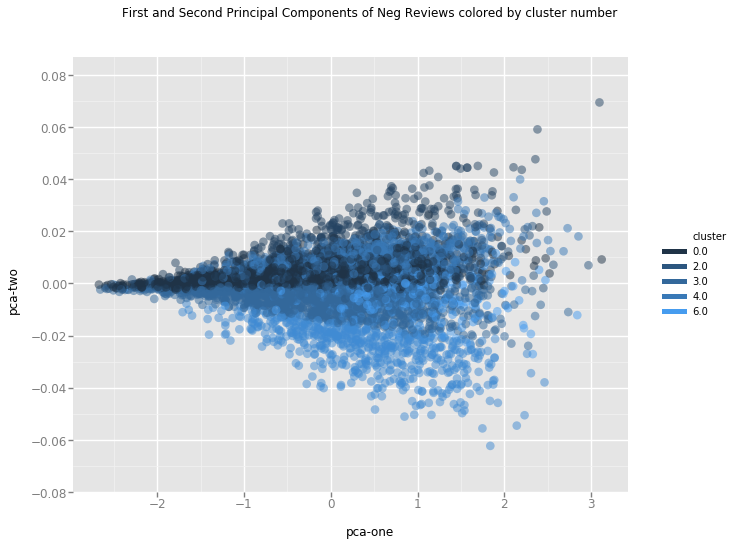

<ggplot: (7016189167)>

In [110]:
from ggplot import *

chart = ggplot(df_neg, aes(x='pca-one', y='pca-two', color='cluster')) \
        + geom_point(size=75,alpha=0.5) \
        + ggtitle("First and Second Principal Components of Neg Reviews colored by cluster number")
chart

## First and Second Principal Components of Neg Reviews colored by cluster number

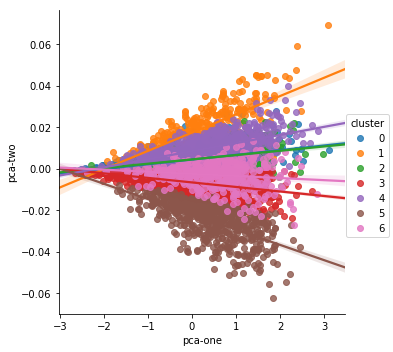

In [98]:
import seaborn

seaborn.lmplot("pca-one", "pca-two", df_neg, hue = "cluster")

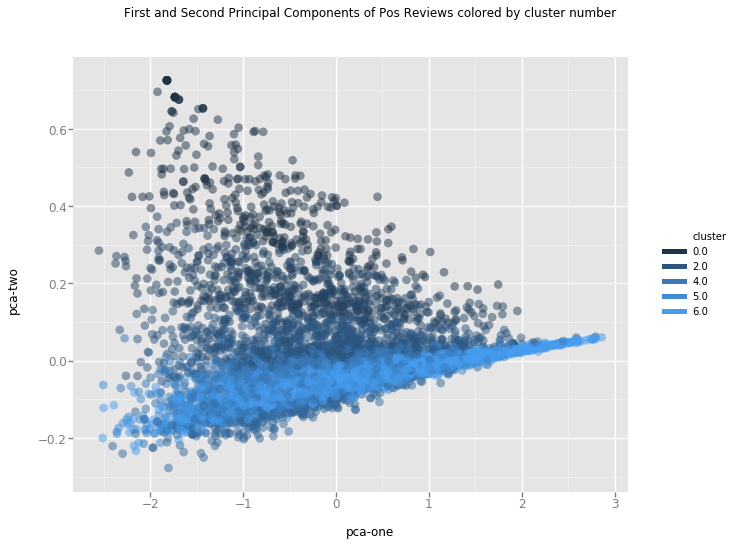

<ggplot: (7561360434)>

In [112]:
chart = ggplot(df_pos, aes(x='pca-one', y='pca-two', color='cluster')) \
        + geom_point(size=75,alpha=0.5) \
        + ggtitle("First and Second Principal Components of Pos Reviews colored by cluster number")
chart

## First and Second Principal Components of Pos Reviews colored by cluster number

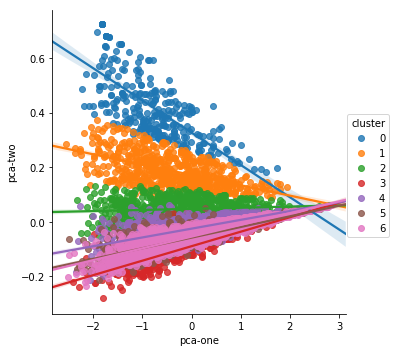

In [101]:
seaborn.lmplot("pca-one", "pca-two", df_pos, hue = "cluster")

In [102]:
df_neg.shape, df_pos.shape

((6058, 20), (7450, 20))

In [104]:
import time
from sklearn.manifold import TSNE


time_start = time.time()
print("Perfoming t-SNE on the Neg reviews:")
tsne_neg = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_neg = tsne_neg.fit_transform(X_neg)

print("Perfoming t-SNE on the Pos reviews:")
tsne_pos = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_pos = tsne_pos.fit_transform(X_pos)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Perfoming t-SNE on the Neg reviews:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6058 samples in 0.036s...
[t-SNE] Computed neighbors for 6058 samples in 1.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6058
[t-SNE] Computed conditional probabilities for sample 2000 / 6058
[t-SNE] Computed conditional probabilities for sample 3000 / 6058
[t-SNE] Computed conditional probabilities for sample 4000 / 6058
[t-SNE] Computed conditional probabilities for sample 5000 / 6058
[t-SNE] Computed conditional probabilities for sample 6000 / 6058
[t-SNE] Computed conditional probabilities for sample 6058 / 6058
[t-SNE] Mean sigma: 0.012604
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.497387
[t-SNE] Error after 300 iterations: 1.399308
Perfoming t-SNE on the Pos reviews:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7450 samples in 0.033s...
[t-SNE] Computed neighbors for 7450 samples in 3.003s...
[t-SNE] Computed conditional p

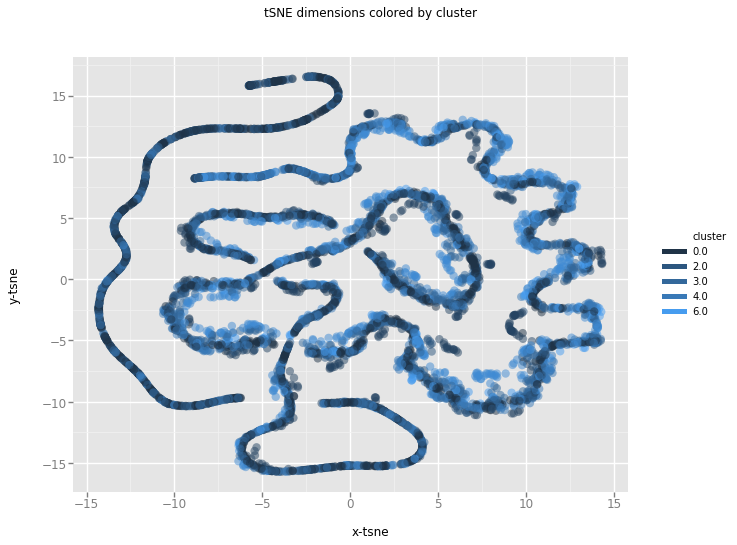

<ggplot: (-9223372029836613246)>

In [106]:

df_neg['x-tsne'] = tsne_results_neg[:,0]
df_neg['y-tsne'] = tsne_results_neg[:,1]

chart = ggplot( df_neg, aes(x='x-tsne', y='y-tsne', color='cluster') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("tSNE dimensions colored by cluster")
chart

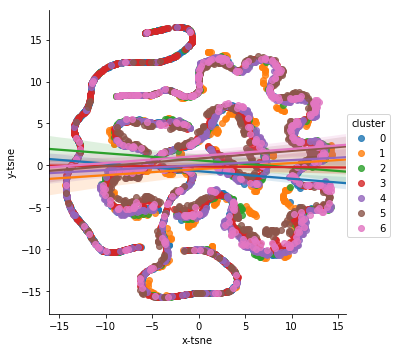

In [107]:
seaborn.lmplot("x-tsne", "y-tsne", df_neg, hue = "cluster")